# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)



# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 611


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hasaki
Processing Record 2 of Set 1 | ola
Processing Record 3 of Set 1 | hobart
Processing Record 4 of Set 1 | lagos
Processing Record 5 of Set 1 | hermanus
Processing Record 6 of Set 1 | maceio
Processing Record 7 of Set 1 | saint george
Processing Record 8 of Set 1 | karaul
City not found. Skipping...
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | arraial do cabo
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | chicama
Processing Record 13 of Set 1 | jamestown
Processing Record 14 of Set 1 | chokurdakh
Processing Record 15 of Set 1 | sao jose da coroa grande
Processing Record 16 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 17 of Set 1 | nemuro
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | mahibadhoo
Processing Record 20 of Set 1 | petropavlovsk-kamchatskiy
Processing Record 21 of Set 1 | bollnas
Pr

Processing Record 36 of Set 4 | dingle
Processing Record 37 of Set 4 | samarai
Processing Record 38 of Set 4 | airai
Processing Record 39 of Set 4 | ahipara
Processing Record 40 of Set 4 | north bend
Processing Record 41 of Set 4 | tiksi
Processing Record 42 of Set 4 | provideniya
Processing Record 43 of Set 4 | berlevag
Processing Record 44 of Set 4 | deputatskiy
Processing Record 45 of Set 4 | sorvag
City not found. Skipping...
Processing Record 46 of Set 4 | samusu
City not found. Skipping...
Processing Record 47 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 48 of Set 4 | borogontsy
Processing Record 49 of Set 4 | kapustin yar
Processing Record 0 of Set 5 | pevek
Processing Record 1 of Set 5 | nuuk
Processing Record 2 of Set 5 | acarau
Processing Record 3 of Set 5 | rocha
Processing Record 4 of Set 5 | severo-kurilsk
Processing Record 5 of Set 5 | half moon bay
Processing Record 6 of Set 5 | sabzevar
Processing Record 7 of Set 5 | ambilobe
Processing Record 

Processing Record 18 of Set 8 | sitka
Processing Record 19 of Set 8 | sehwan
Processing Record 20 of Set 8 | surt
Processing Record 21 of Set 8 | haimen
Processing Record 22 of Set 8 | basoko
Processing Record 23 of Set 8 | aldan
Processing Record 24 of Set 8 | zhireken
Processing Record 25 of Set 8 | giddalur
Processing Record 26 of Set 8 | quelimane
Processing Record 27 of Set 8 | jiuquan
Processing Record 28 of Set 8 | de aar
Processing Record 29 of Set 8 | lake city
Processing Record 30 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 31 of Set 8 | yanan
City not found. Skipping...
Processing Record 32 of Set 8 | cody
Processing Record 33 of Set 8 | olinda
Processing Record 34 of Set 8 | hanna
Processing Record 35 of Set 8 | leshukonskoye
Processing Record 36 of Set 8 | coahuayana
Processing Record 37 of Set 8 | aberystwyth
Processing Record 38 of Set 8 | gazojak
Processing Record 39 of Set 8 | nanortalik
Processing Record 40 of Set 8 | zverinogolovskoye
Proce

Processing Record 8 of Set 12 | mugur-aksy
Processing Record 9 of Set 12 | alegrete
Processing Record 10 of Set 12 | sobolevo
Processing Record 11 of Set 12 | aflu
City not found. Skipping...
Processing Record 12 of Set 12 | canandaigua
Processing Record 13 of Set 12 | bowen
Processing Record 14 of Set 12 | elizabeth city
Processing Record 15 of Set 12 | mirabad
Processing Record 16 of Set 12 | barra
Processing Record 17 of Set 12 | murgab
Processing Record 18 of Set 12 | shenkursk
Processing Record 19 of Set 12 | harsud
Processing Record 20 of Set 12 | kinsale
Processing Record 21 of Set 12 | yuxia
Processing Record 22 of Set 12 | calvia
Processing Record 23 of Set 12 | jardim
Processing Record 24 of Set 12 | bad nenndorf
Processing Record 25 of Set 12 | taquarituba
Processing Record 26 of Set 12 | hongjiang
Processing Record 27 of Set 12 | gulshat
City not found. Skipping...
Processing Record 28 of Set 12 | bilma
Processing Record 29 of Set 12 | chapais
Processing Record 30 of Set 12

In [113]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          553
Lat           553
Lng           553
Max Temp      553
Humidity      553
Cloudiness    553
Wind Speed    553
Country       553
Date          553
dtype: int64

In [114]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hasaki,35.7333,140.8333,4.22,59,63,3.08,JP,1681071951
1,ola,59.5833,151.2833,-14.11,83,100,3.24,RU,1681072151
2,hobart,-42.8794,147.3294,10.92,71,40,7.72,AU,1681072055
3,lagos,6.5833,3.7500,28.18,79,100,2.05,NG,1681072147
4,hermanus,-34.4187,19.2345,16.00,72,0,7.49,ZA,1681072152


In [115]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [116]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hasaki,35.7333,140.8333,4.22,59,63,3.08,JP,1681071951
1,ola,59.5833,151.2833,-14.11,83,100,3.24,RU,1681072151
2,hobart,-42.8794,147.3294,10.92,71,40,7.72,AU,1681072055
3,lagos,6.5833,3.7500,28.18,79,100,2.05,NG,1681072147
4,hermanus,-34.4187,19.2345,16.00,72,0,7.49,ZA,1681072152


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

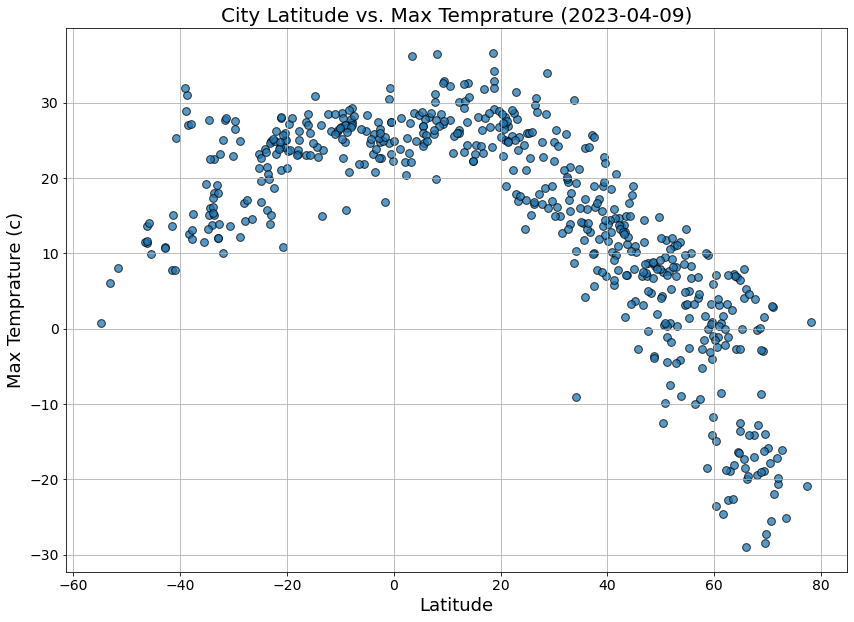

In [117]:
# Pull Date now
date = datetime.date(datetime.now())
# Build scatter plot for latitude vs. temperature
x= city_data_df["Lat"]
y= city_data_df["Max Temp"]
plt.figure(figsize=(14, 10))
plt.scatter(x,y,edgecolor="black",alpha=0.75,s=60)

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude",size=18)
plt.ylabel("Max Temprature (c)",size=18)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.title(f"City Latitude vs. Max Temprature ({date})",size=20)

# Save the figure
plt.savefig("output_data/Fig1.png")

# # Show plot
plt.show()

#### Latitude Vs. Humidity

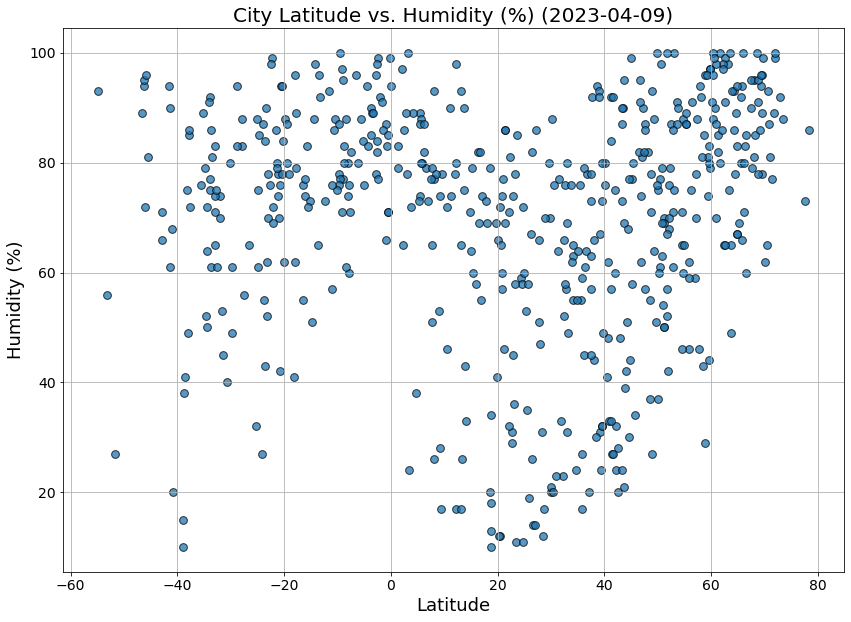

In [118]:
# Pull Date now
date = datetime.date(datetime.now())
# Build the scatter plots for latitude vs. humidity
x= city_data_df["Lat"]
y= city_data_df["Humidity"]
plt.figure(figsize=(14, 10))
plt.scatter(x,y,edgecolor="black",alpha=0.75,s=60)

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude",size=18)
plt.ylabel("Humidity (%)",size=18)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.title(f"City Latitude vs. Humidity (%) ({date})",size=20)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

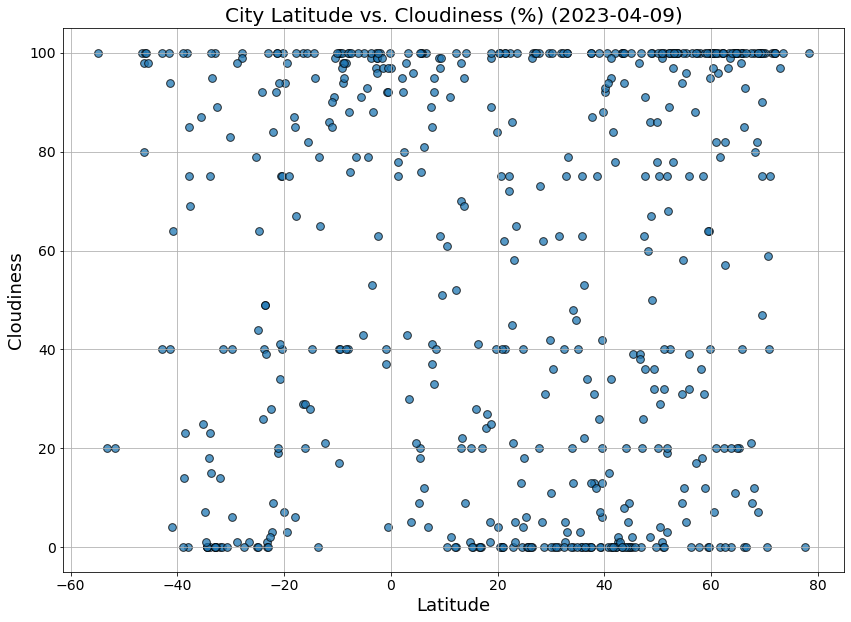

In [119]:
# Pull Date now
date = datetime.date(datetime.now())
# Build the scatter plots for latitude vs. cloudiness
x= city_data_df["Lat"]
y= city_data_df["Cloudiness"]
plt.figure(figsize=(14, 10))
plt.scatter(x,y,edgecolor="black",alpha=0.75,s=60)

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude",size=18)
plt.ylabel("Cloudiness",size=18)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.title(f"City Latitude vs. Cloudiness (%) ({date})",size=20)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

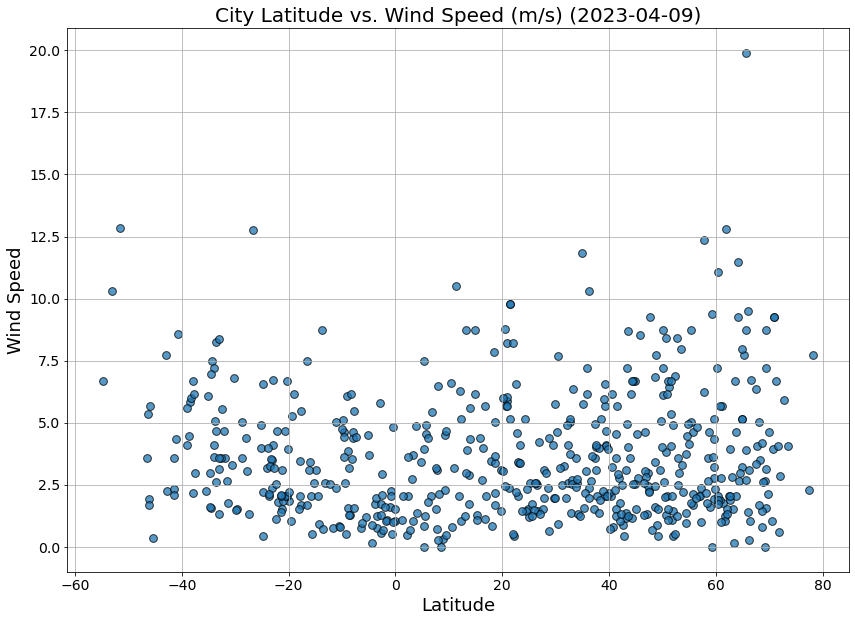

In [120]:
# Pull Date now
date = datetime.date(datetime.now())
# Build the scatter plots for latitude vs. wind speed
x= city_data_df["Lat"]
y= city_data_df["Wind Speed"]
plt.figure(figsize=(14, 10))
plt.scatter(x,y,edgecolor="black",alpha=0.75,s=60)

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude",size=18)
plt.ylabel("Wind Speed",size=18)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.title(f"City Latitude vs. Wind Speed (m/s) ({date})",size=20)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [121]:
# Define a function to create Linear Regression plots
def lnr_fn(x_values, y_values,x_ann,y_ann):
    plt.figure(figsize=(14,10))
    plt.scatter(x_values,y_values,edgecolor="black",alpha=0.80,s=60)
    plt.xlabel(xlabel,size=18)
    plt.ylabel(ylabel,size=18)
    plt.tick_params(axis='both', which='major', labelsize=14)
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
    plt.annotate(line_eq,(x_ann,y_ann),fontsize=15,color="red")
    
    plt.plot(x_values,regress_values,"r-")
    
    print(f"The rvalue is: {rvalue}")
    print(f"The r-squared is: {rvalue**2}")
    print(f"The Slope is: {slope}\n"
          f"The Intercept is: {intercept}\n"
          f"The pvalue is: {pvalue}\n"
          f"The Std. Dev. is: {stderr}"
         )
   
    plt.show()    

In [122]:
#city_data_df.head()

In [123]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df= city_data_df.loc[city_data_df["Lat"]>=0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hasaki,35.7333,140.8333,4.22,59,63,3.08,JP,1681071951
1,ola,59.5833,151.2833,-14.11,83,100,3.24,RU,1681072151
3,lagos,6.5833,3.7500,28.18,79,100,2.05,NG,1681072147
6,saint george,37.1041,-113.5841,25.80,20,0,1.54,US,1681072153
7,albany,42.6001,-73.9662,13.71,20,1,0.89,US,1681071861


In [124]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df= city_data_df.loc[city_data_df["Lat"]<0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,hobart,-42.8794,147.3294,10.92,71,40,7.72,AU,1681072055
4,hermanus,-34.4187,19.2345,16.00,72,0,7.49,ZA,1681072152
5,maceio,-9.6658,-35.7353,28.69,78,40,4.63,BR,1681072153
8,arraial do cabo,-22.9661,-42.0278,24.92,78,100,4.12,BR,1681072154
9,mataura,-46.1927,168.8643,11.38,94,98,1.93,NZ,1681072154


###  Temperature vs. Latitude Linear Regression Plot

The rvalue is: -0.8660976349304714
The r-squared is: 0.7501251132321561
The Slope is: -0.6498215700274594
The Intercept is: 36.95405286195094
The pvalue is: 4.342101224171216e-117
The Std. Dev. is: 0.019189201097300348


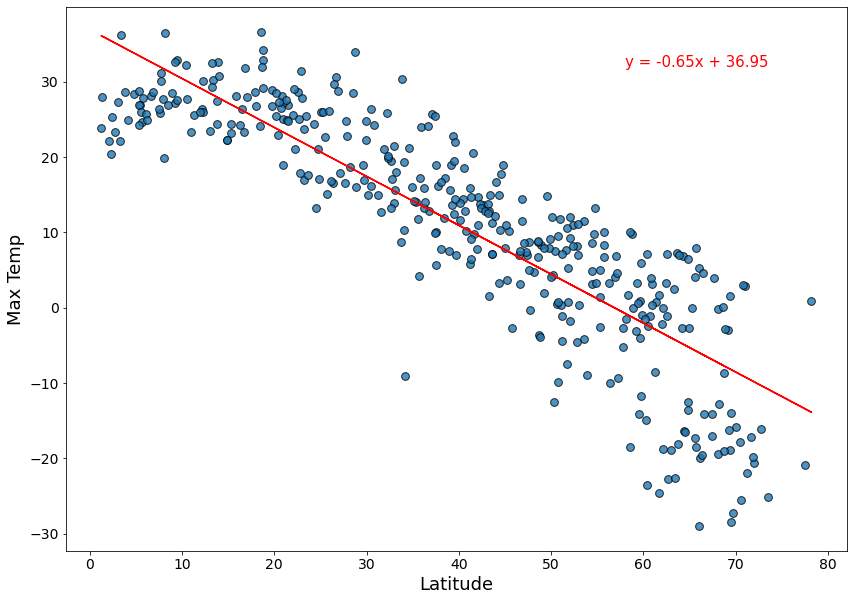

<Figure size 432x288 with 0 Axes>

In [133]:
# Linear regression on Northern Hemisphere
x_values= northern_hemi_df["Lat"]
y_values= northern_hemi_df["Max Temp"]
xlabel='Latitude'
ylabel='Max Temp'
lnr_fn(x_values, y_values,58,32)
# Save the figure
plt.savefig("output_data/Fig5.png")

The rvalue is: 0.6404352582485162
The r-squared is: 0.41015732000784366
The Slope is: 0.29171986283634777
The Intercept is: 28.043165538280853
The pvalue is: 6.859739079599982e-21
The Std. Dev. is: 0.02707077123540751


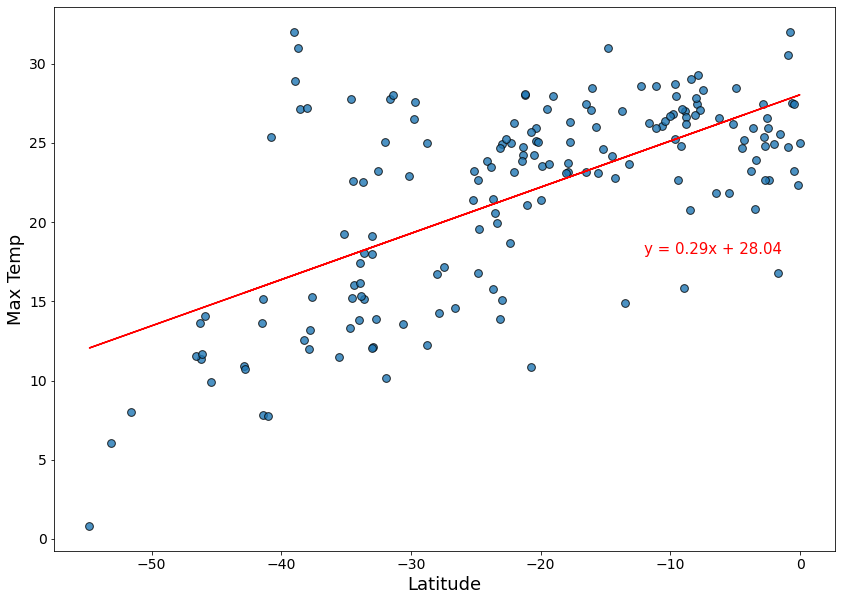

<Figure size 432x288 with 0 Axes>

In [134]:
# Linear regression on Southern Hemisphere
x_values= southern_hemi_df["Lat"]
y_values= southern_hemi_df["Max Temp"]
xlabel='Latitude'
ylabel='Max Temp'
lnr_fn(x_values, y_values,-12,18)
# Save the figure
plt.savefig("output_data/Fig6.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### **Please keep in mind if you'll run all notbook cells creating new weather city list all below slope, intercept & standerd deviations will change as well**

1) Northern Hemisphere: the Latitude vs Maximum Tempreture relationship is negative with -0.65 Slope & 36.95 Intercept but moderate standard deviation 0.019 which mean accuracy is not that perfect.

2) Southern Hemisphere: the Latitude vs Maximum Tempreture relationship is positve with 0.29 Slope & 28.04 Intercept but moderate standard deviation 0.027 which mean accuracy is not that perfect.

### Humidity vs. Latitude Linear Regression Plot

The rvalue is: 0.3180384581442125
The r-squared is: 0.10114846085874801
The Slope is: 0.3801055722865199
The Intercept is: 51.84081220855662
The pvalue is: 1.7906767752377757e-10
The Std. Dev. is: 0.057974484916306336


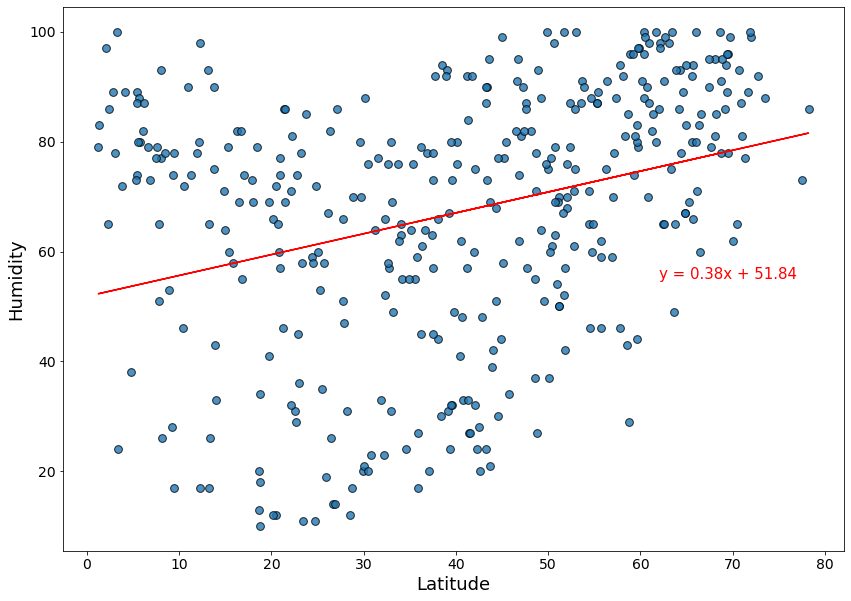

<Figure size 432x288 with 0 Axes>

In [135]:
# Northern Hemisphere
x_values= northern_hemi_df["Lat"]
y_values= northern_hemi_df["Humidity"]
xlabel='Latitude'
ylabel='Humidity'
lnr_fn(x_values, y_values,62,55)
# Save the figure
plt.savefig("output_data/Fig7.png")

The rvalue is: 0.33372577413907845
The r-squared is: 0.1113728923247272
The Slope is: 0.4304057697201265
The Intercept is: 84.37286056792829
The pvalue is: 9.248944275149968e-06
The Std. Dev. is: 0.09407839041652781


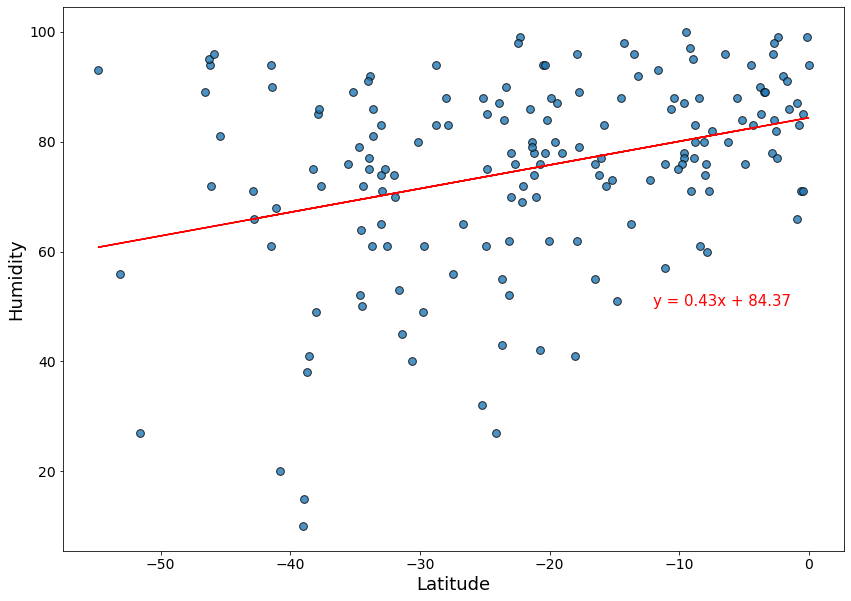

<Figure size 432x288 with 0 Axes>

In [136]:
# Southern Hemisphere
x_values= southern_hemi_df["Lat"]
y_values= southern_hemi_df["Humidity"]
xlabel='Latitude'
ylabel='Humidity'
lnr_fn(x_values, y_values,-12,50)
# Save the figure
plt.savefig("output_data/Fig8.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### **Please keep in mind if you'll run all notbook cells creating new weather city list all below slope, intercept & standerd deviations will change as well**

1) Northern Hemisphere: the Latitude vs Humidity relationship is positve with 0.38 Slope & 51.84 Intercept but moderate standard deviation 0.058 which mean accuracy is not good.
    
2) Southern Hemisphere: the Latitude vs Humidity relationship is positve with 0.43 Slope & 84.37 Intercept but moderate standard deviation 0.094 which mean accuracy is not good.

### Cloudiness vs. Latitude Linear Regression Plot

The rvalue is: 0.17062093899313194
The r-squared is: 0.02911150482289805
The Slope is: 0.3553576601996702
The Intercept is: 38.36911100479507
The pvalue is: 0.0007872945341081633
The Std. Dev. is: 0.104999286977965


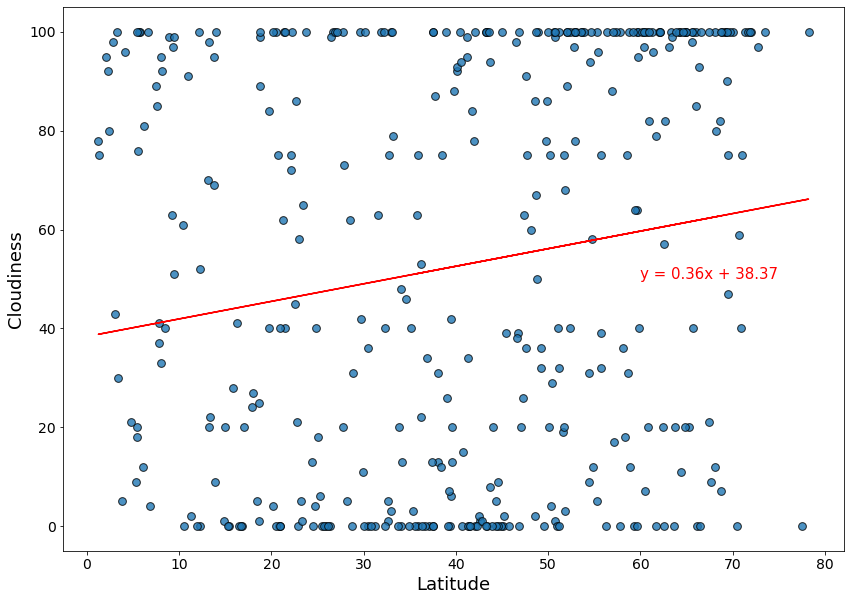

<Figure size 432x288 with 0 Axes>

In [137]:
# Northern Hemisphere
x_values= northern_hemi_df["Lat"]
y_values= northern_hemi_df["Cloudiness"]
xlabel='Latitude'
ylabel='Cloudiness'
lnr_fn(x_values, y_values,60,50)
# Save the figure
plt.savefig("output_data/Fig9.png")

The rvalue is: 0.3071781166852557
The r-squared is: 0.09435839537030055
The Slope is: 0.8835928960228874
The Intercept is: 78.87489519752484
The pvalue is: 4.858416990404115e-05
The Std. Dev. is: 0.21182727985590236


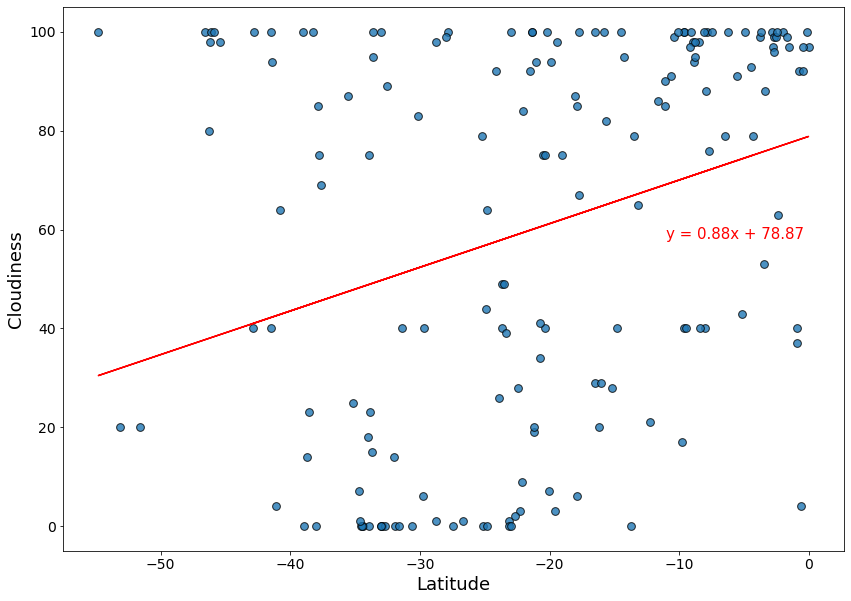

<Figure size 432x288 with 0 Axes>

In [138]:
# Southern Hemisphere
x_values= southern_hemi_df["Lat"]
y_values= southern_hemi_df["Cloudiness"]
xlabel='Latitude'
ylabel='Cloudiness'
lnr_fn(x_values, y_values,-11,58)
# Save the figure
plt.savefig("output_data/Fig10.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### **Please keep in mind if you'll run all notbook cells creating new weather city list all below slope, intercept & standerd deviations will change as well**

1) Northern Hemisphere: the Latitude vs Cloudiness relationship is negative with 0.36 Slope & 38.37 Intercept but moderate standard deviation 0.104 which mean accuracy is so bad.
    
2) Southern Hemisphere: the Latitude vs Cloudiness relationship is positve with 0.88 Slope & 78.87 Intercept but moderate standard deviation 0.21 which mean accuracy is so bad.

### Wind Speed vs. Latitude Linear Regression Plot

The rvalue is: 0.1171827924931903
The r-squared is: 0.013731806856502098
The Slope is: 0.015648322945894393
The Intercept is: 3.0449018121412115
The pvalue is: 0.021633815068644795
The Std. Dev. is: 0.006785311492208069


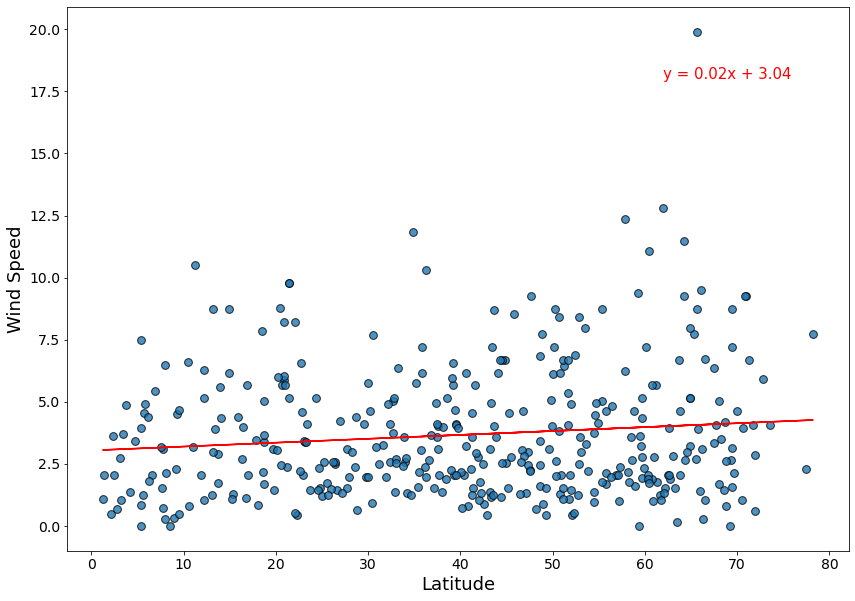

<Figure size 432x288 with 0 Axes>

In [139]:
# Northern Hemisphere
x_values= northern_hemi_df["Lat"]
y_values= northern_hemi_df["Wind Speed"]
xlabel='Latitude'
ylabel='Wind Speed'
lnr_fn(x_values, y_values,62,18)
# Save the figure
plt.savefig("output_data/Fig11.png")

The rvalue is: -0.4160598409507482
The r-squared is: 0.1731057912519619
The Slope is: -0.07081748020491277
The Intercept is: 1.9045223897634043
The pvalue is: 1.8464120899993505e-08
The Std. Dev. is: 0.011977092694007421


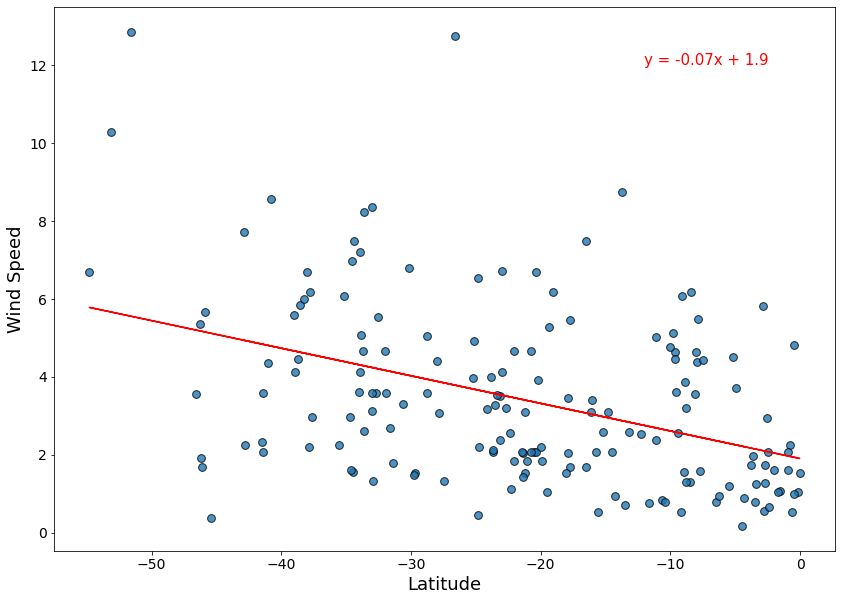

<Figure size 432x288 with 0 Axes>

In [140]:
# Southern Hemisphere
x_values= southern_hemi_df["Lat"]
y_values= southern_hemi_df["Wind Speed"]
xlabel='Latitude'
ylabel='Wind Speed'
lnr_fn(x_values, y_values,-12,12)
# Save the figure
plt.savefig("output_data/Fig12.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### **Please keep in mind if you'll run all notbook cells creating new weather city list all below slope, intercept & standerd deviations will change as well**

1) Northern Hemisphere: the Latitude vs Wind Speed relationship is pefrect horizontal with 0.02 Slope & 3.04 Intercept but moderate standard deviation 0.0068 which mean accuracy is so bad.

2) Southern Hemisphere: the Latitude vs Wind Speed relationship is negative with -0.07 Slope & 1.9 Intercept but moderate standard deviation 0.012 which mean accuracy is not that perfect.